1. Here I use the premade modules to read in, clean input data,

2. Then, from  https://github.com/bukosabino/ta I use the ta library to get certain technical indicators required to generate trading signals for two trading strategies: the RSI and BB

3. Afterwards, I generate financial results of backtesting using a custom financial-evaluation module

## Contents

[0. Dependencies](#sec1)

[1. Data cleaning](#sec2)

[2. Technical Indicators \& Strategies](#sec3)

[3. Save Results](#sec4)

## 0. Dependencies
<a id = 'sec1'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time

import sys
sys.path.append('../utils/')
import data_cleaning 
import get_data
from visualize import ts_with_markers

from ta.momentum import rsi
from ta.volatility import bollinger_lband_indicator, bollinger_hband_indicator

## 1. Data cleaning
<a id = 'sec2'></a>

### Data related parameter settings


In [2]:
TestVarNames = []
assets= 'Testing'
path = "../data/data_raw/" + assets
VarName = "Adj Close"

datas_test = []

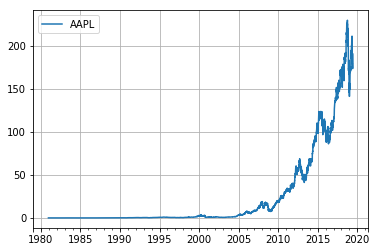

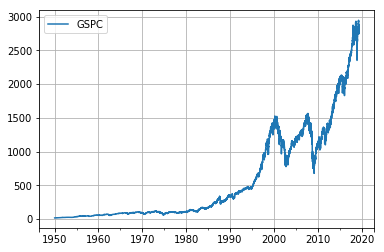

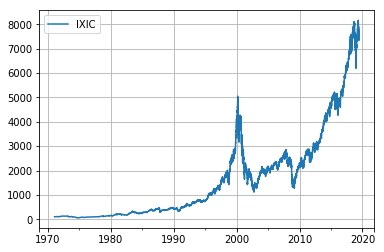

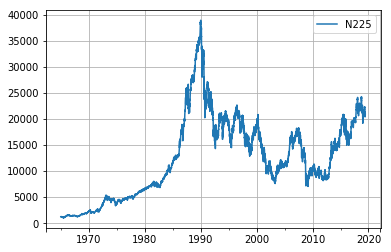

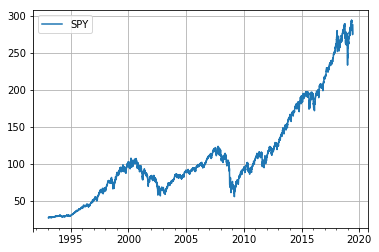

In [3]:
for name in os.listdir(path):
    df, num_missing = data_cleaning.create_cleaned_set(file_with_path = path + '/' + name,
                                                     varname = VarName,
                                                     datename = "Date",
                                                     weekdays = True,
                                                     fill_na_method = "ffill"
                                                    )
    TestVarNames.append(name)
    df.rename(columns={VarName: name[:-4]}, inplace = True)
    datas_test.append(df)
    
    df.plot(grid = True)

## Creating the 3 subsets corresponding to the 3 testing periods:

1. Test 1: 2005-12-07 to 2007-12-31
2. Test 2: 2008-12-08 to 2010-12-31
3. Test 3: 2017-05-08 to 2019-06-07

### Test 1

In [4]:
first_date_te1 = "2005-12-07"
last_date_te1 = "2007-12-31"
print("Date from " + str(first_date_te1) + " to " + last_date_te1)

Date from 2005-12-07 to 2007-12-31


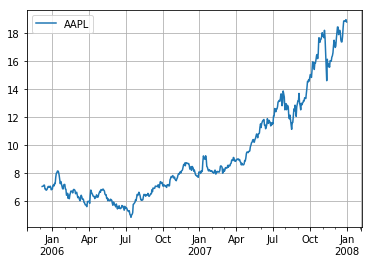

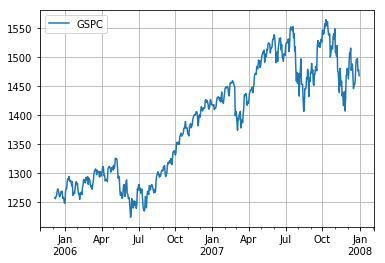

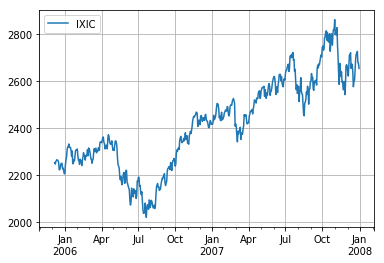

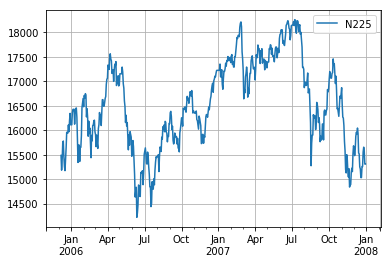

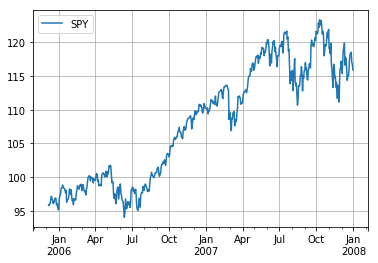

In [5]:
datas_test1 = []
for data in datas_test:
    datas_test1.append(data.loc[first_date_te1:last_date_te1])
    data.loc[first_date_te1:last_date_te1].plot(grid = True)

### Test 2

In [6]:
first_date_te2 = "2008-12-08"
last_date_te2 = "2010-12-31"

print("Date from " + str(first_date_te2) + " to " + last_date_te2)

Date from 2008-12-08 to 2010-12-31


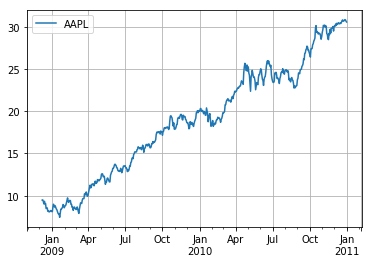

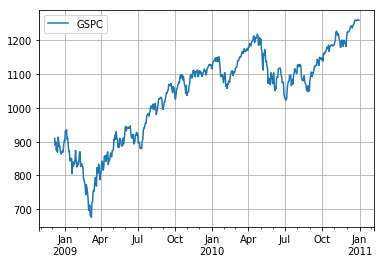

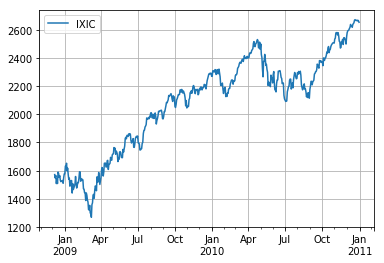

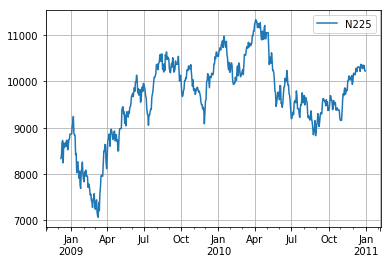

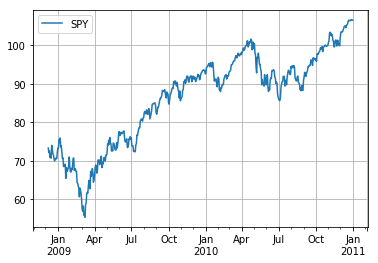

In [7]:
datas_test2 = []
for data in datas_test:
    datas_test2.append(data.loc[first_date_te2:last_date_te2])
    data.loc[first_date_te2:last_date_te2].plot(grid = True)

### Test 3

In [8]:
first_date_te3 = "2017-05-08"
last_date_te3 = "2019-06-07"
print("Date from " + str(first_date_te3) + " to " + last_date_te3)

Date from 2017-05-08 to 2019-06-07


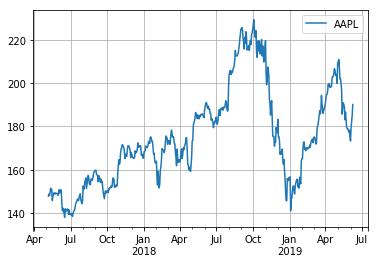

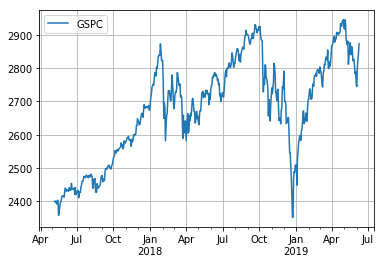

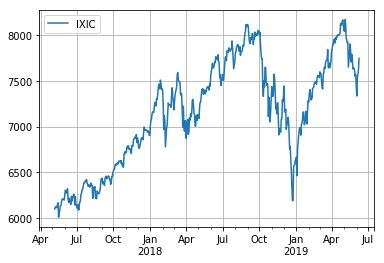

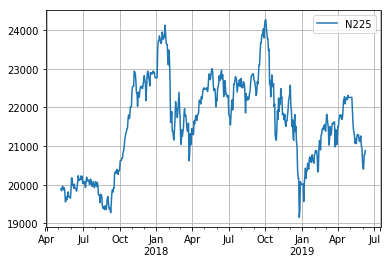

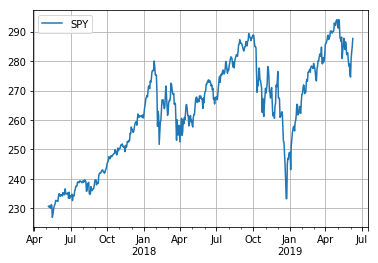

In [9]:
datas_test3 = []
for data in datas_test:
    datas_test3.append(data.loc[first_date_te3:last_date_te3])
    data.loc[first_date_te3:last_date_te3].plot(grid = True)

## 2. Technical Indicators and Startegies
<a id = 'sec3'></a>

### Adding RSI & Bollinger Band Indicators

#### Test 1

In [10]:
for idx, data in enumerate(datas_test1):
    name = TestVarNames[idx][:-4]
    ## Add RSI
    data['RSI'] = rsi(data[name], n = 20, fillna = False)
    
    # Add bollinger band high indicator filling NaN values
    data['bb_high_indicator'] = bollinger_hband_indicator(data[name], n=20, ndev=2, fillna=False)

    # Add bollinger band low indicator filling NaN values
    data['bb_low_indicator'] = bollinger_lband_indicator(data[name], n=20, ndev=2, fillna=False)
    
    print(data.describe())


C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

             AAPL         RSI  bb_high_indicator  bb_low_indicator
count  539.000000  519.000000         539.000000        539.000000
mean     9.354286   56.668727           0.074212          0.029685
std      3.624268   15.060958           0.262358          0.169873
min      4.808185   24.905546           0.000000          0.000000
25%      6.633909   44.770297           0.000000          0.000000
50%      8.101892   56.535946           0.000000          0.000000
75%     11.603411   69.271793           0.000000          0.000000
max     18.962296   89.519601           1.000000          1.000000
              GSPC         RSI  bb_high_indicator  bb_low_indicator
count   539.000000  519.000000         539.000000        539.000000
mean   1389.258962   55.206574           0.046382          0.033395
std      97.334543   12.240613           0.210507          0.179833
min    1223.689941   19.951101           0.000000          0.000000
25%    1290.695007   46.737599           0.000000        

#### Test 2

In [11]:
for idx, data in enumerate(datas_test2):
    name = TestVarNames[idx][:-4]
    ## Add RSI
    data['RSI'] = rsi(data[name], n = 20, fillna = False)
    
    # Add bollinger band high indicator filling NaN values
    data['bb_high_indicator'] = bollinger_hband_indicator(data[name], n=20, ndev=2, fillna=False)

    # Add bollinger band low indicator filling NaN values
    data['bb_low_indicator'] = bollinger_lband_indicator(data[name], n=20, ndev=2, fillna=False)
    
    print(data.describe())


             AAPL         RSI  bb_high_indicator  bb_low_indicator
count  540.000000  520.000000         540.000000        540.000000
mean    18.908177   59.894887           0.066667          0.012963
std      6.684456   13.452863           0.249675          0.113220
min      7.420563   23.707143           0.000000          0.000000
25%     13.031777   50.015715           0.000000          0.000000
50%     19.022557   60.768732           0.000000          0.000000
75%     24.169029   69.375874           0.000000          0.000000
max     30.884562   88.196297           1.000000          1.000000


C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

              GSPC         RSI  bb_high_indicator  bb_low_indicator
count   540.000000  520.000000         540.000000        540.000000
mean   1038.419480   55.957170           0.031481          0.027778
std     133.029960   13.814095           0.174777          0.164488
min     676.530029   22.242110           0.000000          0.000000
25%     919.080017   45.853970           0.000000          0.000000
50%    1075.909973   57.750055           0.000000          0.000000
75%    1134.630035   66.349958           0.000000          0.000000
max    1259.780029   83.261641           1.000000          1.000000
              IXIC         RSI  bb_high_indicator  bb_low_indicator
count   540.000000  520.000000         540.000000        540.000000
mean   2078.160019   57.277736           0.046296          0.027778
std     342.822982   13.942768           0.210321          0.164488
min    1268.640015   24.102420           0.000000          0.000000
25%    1796.435029   47.581818           0.00000

#### Test 3

In [12]:
for idx, data in enumerate(datas_test3):
    name = TestVarNames[idx][:-4]
    ## Add RSI
    data['RSI'] = rsi(data[name], n = 20, fillna = False)
    
    # Add bollinger band high indicator filling NaN values
    data['bb_high_indicator'] = bollinger_hband_indicator(data[name], n=20, ndev=2, fillna=False)

    # Add bollinger band low indicator filling NaN values
    data['bb_low_indicator'] = bollinger_lband_indicator(data[name], n=20, ndev=2, fillna=False)
    
    print(data.describe())


             AAPL         RSI  bb_high_indicator  bb_low_indicator
count  545.000000  525.000000         545.000000        545.000000
mean   174.738061   54.442416           0.078899          0.056881
std     22.174895   15.784149           0.269829          0.231827
min    137.991791   15.120947           0.000000          0.000000
25%    155.898438   41.351123           0.000000          0.000000
50%    171.016678   55.425220           0.000000          0.000000
75%    187.840683   66.975397           0.000000          0.000000
max    229.392090   89.010924           1.000000          1.000000


C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

              GSPC         RSI  bb_high_indicator  bb_low_indicator
count   545.000000  525.000000         545.000000        545.000000
mean   2678.969783   57.188770           0.053211          0.044037
std     153.060483   14.428655           0.224660          0.205365
min    2351.100098   12.053339           0.000000          0.000000
25%    2562.100098   46.697270           0.000000          0.000000
50%    2703.959961   59.412461           0.000000          0.000000
75%    2798.429932   67.746372           0.000000          0.000000
max    2945.830078   89.189644           1.000000          1.000000
              IXIC         RSI  bb_high_indicator  bb_low_indicator
count   545.000000  525.000000         545.000000        545.000000
mean   7150.880986   56.449837           0.060550          0.038532
std     579.642922   13.891859           0.238723          0.192654
min    6011.240234   13.660406           0.000000          0.000000
25%    6698.959961   46.174306           0.00000

### Add Buy-Sell Signals

#### Test 1

In [13]:
for data in datas_test1:
    data["RSI_Signals"] = "NaN"
    data["BB_Signals"] = "Hold"
    
    # Generating Signals for RSI
    for idx, RSI in enumerate(data["RSI"][1:]):        
        if ((RSI > 30) & (RSI < 70)):
            # If crossed the 30-line from below
            if data["RSI"][idx] <= 30:
                data["RSI_Signals"].iloc[idx+1] = "Buy"
            # If crossed 70 line from above
            elif data["RSI"][idx] >= 70:
                data["RSI_Signals"].iloc[idx+1] = "Sell"
            else:
                data["RSI_Signals"].iloc[idx+1] = "Hold"
        else:
            data["RSI_Signals"].iloc[idx+1] = "Hold"
    
    data['BB_Signals'].loc[data["bb_high_indicator"]==1] = "Sell"
    data['BB_Signals'].loc[data["bb_low_indicator"]==1] = "Buy"
    
    print(data.tail(50))
    
    

C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Corvinus\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/p

                 AAPL        RSI  bb_high_indicator  bb_low_indicator  \
2007-10-23  17.665123  81.217609                1.0               0.0   
2007-10-24  17.643295  80.664584                1.0               0.0   
2007-10-25  17.344389  73.128154                0.0               0.0   
2007-10-26  17.526577  74.719344                0.0               0.0   
2007-10-29  17.563587  75.051041                0.0               0.0   
2007-10-30  17.744827  76.705328                0.0               0.0   
2007-10-31  18.024763  79.074049                0.0               0.0   
2007-11-01  17.786585  72.172629                0.0               0.0   
2007-11-02  17.827383  72.624966                0.0               0.0   
2007-11-05  17.667021  67.834592                0.0               0.0   
2007-11-06  18.199366  74.102222                0.0               0.0   
2007-11-07  17.678406  61.202991                0.0               0.0   
2007-11-08  16.650724  44.364919                0.0

                   IXIC        RSI  bb_high_indicator  bb_low_indicator  \
2007-10-23  2799.260010  59.297686                0.0               0.0   
2007-10-24  2774.760010  54.222551                0.0               0.0   
2007-10-25  2750.860107  49.641640                0.0               0.0   
2007-10-26  2804.189941  58.324991                0.0               0.0   
2007-10-29  2817.439941  60.209120                0.0               0.0   
2007-10-30  2816.709961  60.043823                0.0               0.0   
2007-10-31  2859.120117  66.032021                1.0               0.0   
2007-11-01  2794.830078  52.779050                0.0               0.0   
2007-11-02  2810.379883  55.183646                0.0               0.0   
2007-11-05  2795.179932  52.305971                0.0               0.0   
2007-11-06  2825.179932  57.177326                0.0               0.0   
2007-11-07  2748.760010  44.407314                0.0               0.0   
2007-11-08  2696.000000  

                   SPY        RSI  bb_high_indicator  bb_low_indicator  \
2007-10-23  119.667679  44.911235                0.0               0.0   
2007-10-24  119.446922  43.793043                0.0               0.0   
2007-10-25  119.730820  45.714192                0.0               0.0   
2007-10-26  121.134346  54.257312                0.0               0.0   
2007-10-29  121.536499  56.428843                0.0               0.0   
2007-10-30  120.692787  50.833081                0.0               0.0   
2007-10-31  121.946571  57.719485                0.0               0.0   
2007-11-01  119.092087  42.677912                0.0               0.0   
2007-11-02  119.226120  43.442818                0.0               0.0   
2007-11-05  118.319305  39.501243                0.0               0.0   
2007-11-06  119.912140  48.561808                0.0               0.0   
2007-11-07  116.631889  36.216174                0.0               1.0   
2007-11-08  116.040459  34.469869     

#### Test 2

In [14]:
for data in datas_test2:
    data["RSI_Signals"] = "NaN"
    data["BB_Signals"] = "Hold"
    
    # Generating Signals for RSI
    for idx, RSI in enumerate(data["RSI"][1:]):        
        if ((RSI > 30) & (RSI < 70)):
            # If crossed the 30-line from below
            if data["RSI"][idx] <= 30:
                data["RSI_Signals"].iloc[idx+1] = "Buy"
            # If crossed 70 line from above
            elif data["RSI"][idx] >= 70:
                data["RSI_Signals"].iloc[idx+1] = "Sell"
            else:
                data["RSI_Signals"].iloc[idx+1] = "Hold"
        else:
            data["RSI_Signals"].iloc[idx+1] = "Hold"
    
    data['BB_Signals'].loc[data["bb_high_indicator"]==1] = "Sell"
    data['BB_Signals'].loc[data["bb_low_indicator"]==1] = "Buy"
    
    print(data.tail(50))
    
    

C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pand

                 AAPL        RSI  bb_high_indicator  bb_low_indicator  \
2010-10-25  29.306490  65.921646                0.0               0.0   
2010-10-26  29.231529  64.243074                0.0               0.0   
2010-10-27  29.210653  63.743471                0.0               0.0   
2010-10-28  28.964882  57.885862                0.0               0.0   
2010-10-29  28.560642  49.599950                0.0               0.0   
2010-11-01  28.864294  54.953385                0.0               0.0   
2010-11-02  29.355837  62.147079                0.0               0.0   
2010-11-03  29.682253  66.118354                0.0               0.0   
2010-11-04  30.201326  71.393331                0.0               0.0   
2010-11-05  30.093153  68.921785                0.0               0.0   
2010-11-08  30.234535  70.401966                0.0               0.0   
2010-11-09  29.993509  64.604270                0.0               0.0   
2010-11-10  30.178547  66.916071                0.0

                   IXIC        RSI  bb_high_indicator  bb_low_indicator  \
2010-10-25  2490.850098  71.015013                0.0               0.0   
2010-10-26  2497.290039  72.090533                0.0               0.0   
2010-10-27  2503.260010  73.112760                0.0               0.0   
2010-10-28  2507.370117  73.841799                0.0               0.0   
2010-10-29  2507.409912  73.849387                0.0               0.0   
2010-11-01  2504.840088  72.351404                0.0               0.0   
2010-11-02  2533.520020  77.884795                0.0               0.0   
2010-11-03  2540.270020  78.979154                0.0               0.0   
2010-11-04  2577.340088  83.834699                1.0               0.0   
2010-11-05  2578.979980  84.015230                0.0               0.0   
2010-11-08  2580.050049  84.142948                0.0               0.0   
2010-11-09  2562.979980  73.752964                0.0               0.0   
2010-11-10  2578.780029  

                   SPY        RSI  bb_high_indicator  bb_low_indicator  \
2010-10-25  100.000664  68.601838                0.0               0.0   
2010-10-26  100.017532  68.709562                0.0               0.0   
2010-10-27   99.731079  64.552606                0.0               0.0   
2010-10-28   99.747925  64.691456                0.0               0.0   
2010-10-29   99.823723  65.366125                0.0               0.0   
2010-11-01   99.857460  65.688650                0.0               0.0   
2010-11-02  100.649368  72.365200                0.0               0.0   
2010-11-03  101.053749  75.099829                0.0               0.0   
2010-11-04  102.999847  83.686552                1.0               0.0   
2010-11-05  103.387367  84.837341                1.0               0.0   
2010-11-08  103.193611  81.654206                1.0               0.0   
2010-11-09  102.452255  70.472121                0.0               0.0   
2010-11-10  102.865036  72.767187     

#### Test 3

In [15]:
for data in datas_test3:
    data["RSI_Signals"] = "NaN"
    data["BB_Signals"] = "Hold"
    
    # Generating Signals for RSI
    for idx, RSI in enumerate(data["RSI"][1:]):        
        if ((RSI > 30) & (RSI < 70)):
            # If crossed the 30-line from below
            if data["RSI"][idx] <= 30:
                data["RSI_Signals"].iloc[idx+1] = "Buy"
            # If crossed 70 line from above
            elif data["RSI"][idx] >= 70:
                data["RSI_Signals"].iloc[idx+1] = "Sell"
            else:
                data["RSI_Signals"].iloc[idx+1] = "Hold"
        else:
            data["RSI_Signals"].iloc[idx+1] = "Hold"
    
    data['BB_Signals'].loc[data["bb_high_indicator"]==1] = "Sell"
    data['BB_Signals'].loc[data["bb_low_indicator"]==1] = "Buy"
    
    print(data.tail(50))
    
    

C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pand

                  AAPL        RSI  bb_high_indicator  bb_low_indicator  \
2019-04-01  190.506363  66.975397                0.0               0.0   
2019-04-02  193.275696  71.336572                0.0               0.0   
2019-04-03  194.600601  73.207489                0.0               0.0   
2019-04-04  194.939301  73.692665                0.0               0.0   
2019-04-05  196.244263  75.576095                0.0               0.0   
2019-04-08  199.332382  79.428265                0.0               0.0   
2019-04-09  198.734680  76.835815                0.0               0.0   
2019-04-10  199.850372  78.297237                0.0               0.0   
2019-04-11  198.186783  70.923061                0.0               0.0   
2019-04-12  198.107086  70.571131                0.0               0.0   
2019-04-15  198.465714  71.279928                0.0               0.0   
2019-04-16  198.485641  71.322346                0.0               0.0   
2019-04-17  202.350754  78.218940     

                   IXIC        RSI  bb_high_indicator  bb_low_indicator  \
2019-04-01  7828.910156  66.739641                0.0               0.0   
2019-04-02  7848.689941  67.937856                0.0               0.0   
2019-04-03  7895.549805  70.701594                0.0               0.0   
2019-04-04  7891.779785  70.163788                0.0               0.0   
2019-04-05  7938.689941  72.989441                0.0               0.0   
2019-04-08  7953.879883  73.874939                0.0               0.0   
2019-04-09  7909.279785  66.771178                0.0               0.0   
2019-04-10  7964.240234  70.619180                0.0               0.0   
2019-04-11  7947.359863  67.948052                0.0               0.0   
2019-04-12  7984.160156  70.625254                0.0               0.0   
2019-04-15  7976.009766  69.210147                0.0               0.0   
2019-04-16  8000.229980  71.111322                0.0               0.0   
2019-04-17  7996.080078  

                   SPY        RSI  bb_high_indicator  bb_low_indicator  \
2019-04-01  285.829987  67.193424                0.0               0.0   
2019-04-02  285.970001  67.468266                0.0               0.0   
2019-04-03  286.420013  68.408446                0.0               0.0   
2019-04-04  287.179993  70.025413                0.0               0.0   
2019-04-05  288.570007  72.836056                0.0               0.0   
2019-04-08  288.790009  73.274438                0.0               0.0   
2019-04-09  287.309998  65.423889                0.0               0.0   
2019-04-10  288.290009  67.937922                0.0               0.0   
2019-04-11  288.209991  67.495039                0.0               0.0   
2019-04-12  290.160004  72.350016                0.0               0.0   
2019-04-15  289.970001  71.204675                0.0               0.0   
2019-04-16  290.160004  71.699841                0.0               0.0   
2019-04-17  289.450012  66.945312     

## Save Results

### Test 1

In [16]:
path = "../data/competing-strategies-signals/test1"

In [17]:
for idx, data in enumerate(datas_test1):
    name = TestVarNames[idx][:-4]
    data[[name, "RSI_Signals", "BB_Signals"]].to_csv(path + "/test1_" + name + "_competing_signals.csv")

### Test 2

In [18]:
path = "../data/competing-strategies-signals/test2"

In [19]:
for idx, data in enumerate(datas_test2):
    name = TestVarNames[idx][:-4]
    data[[name, "RSI_Signals", "BB_Signals"]].to_csv(path + "/test2_" + name + "_competing_signals.csv")

### Test 3

In [20]:
path = "../data/competing-strategies-signals/test3"

In [21]:
for idx, data in enumerate(datas_test3):
    name = TestVarNames[idx][:-4]
    data[[name, "RSI_Signals", "BB_Signals"]].to_csv(path + "/test3_" + name + "_competing_signals.csv")